# ROC curve comparison PyMC3, susie, varbvs, logit
ROC curve for comparing methods, susie calibrate

In [1]:
import pandas as pd, numpy as np
import os
from collections import Counter
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/data/deletion_simu_20")
n = 20

## block20

In [2]:
susie = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.block_0_7.SuSiE.L_1.susie.all.blocks.pip.csv", header = None, names = ["susie_pip"])
pymc3 = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.pymc3.all.blocks.pip.gz", compression = "gzip", header = None, names = ["pymc3_pip"])
logit = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.logit.all.blocks.pip.csv", header = None, names = ["logit_pip"])
varbvs = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.combined.genes.varbvs.all.blocks.pip.csv", header = None, names = ["varbvs_pip"])

In [3]:
beta = pd.read_csv(f"{cwd}/deletion.genes.block20.for_simu.shape0.scale1.beta", header = None, names = ["beta"])
index = pd.read_csv(f"{cwd}/deletion.genes.block20.for_simu.sample.combined.block1.forsimu.index.csv", header = None, names = ["s", "e"], sep = '\t')

## block 30

In [ ]:
varbvs = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.genes.varbvs.all.blocks.pip.csv", header = None, names = ["varbvs_pip"])
susie = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.genes.SuSiE.L_1.susie.all.blocks.pip.csv", header = None, names = ["susie_pip"])
logit = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.genes.logit.all.blocks.pip.csv", header = None, names = ["logit_pip"])
pymc3 = pd.read_csv(f"{cwd}/deletion.genes.block{n}.for_simu.sample.genes.pymc3.all.blocks.pip.gz", compression = "gzip", header = None, names = ["pymc3_pip"])

In [ ]:
beta = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block{n}.for_simu.sample.shape0.0.scale1.0.beta", header = None, names = ["beta"])
index = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block{n}.for_simu.sample.block1.forsimu.index.csv", header = None, names = ["s", "e"], sep = '\t')

## Drawing

In [4]:
b1 = list()
for i, x in index.iterrows():
    b1.extend([j for j in range(x["s"], x["e"]+1)])

In [5]:
beta = beta.iloc[b1]
beta = beta.set_index([[i for i in range(beta.shape[0])]])

In [6]:
res = pd.concat([beta, varbvs, susie, logit, pymc3], axis = 1)

In [7]:
res["is_signal"] = res["beta"].apply(lambda x: 1 if x != 0 else 0)

In [8]:
res.head(10)

,beta,varbvs_pip,susie_pip,logit_pip,pymc3_pip,is_signal
0,0.000000,0.092718,0.125,0.125,0.0260,0
1,0.000000,0.092714,0.125,0.125,0.0205,0
2,0.000000,0.092710,0.125,0.125,0.0235,0
3,-0.000000,0.092706,0.125,0.125,0.0270,0
4,-0.266134,0.092703,0.125,0.125,0.0180,1
5,-0.000000,0.092700,0.125,0.125,0.0180,0
6,0.000000,0.092699,0.125,0.125,0.0210,0
7,-0.000000,0.092698,0.125,0.125,0.0175,0
8,-0.000000,0.082397,0.100,0.100,0.0265,0
9,0.000000,0.082397,0.100,0.100,0.0235,0


In [9]:
calib = res[["varbvs_pip", "susie_pip", "logit_pip", "pymc3_pip", "is_signal"]]

In [10]:
cutoffs = [0.025*i for i in range(0,41)]

In [12]:
res1 = pd.DataFrame({"cutoff": cutoffs})

In [13]:
n1 = len(b1)
n2 = sum(res["is_signal"])

In [14]:
n1,  n2

(2290, 112)

In [16]:
res.shape

(2290, 6)

In [14]:
for x in ["varbvs_pip", "susie_pip", "logit_pip", "pymc3_pip"]:
    res1[f"{x}_FDR"] = [sum(res[x]>i)/n1 for i in cutoffs]
    res1[f"{x}_power"] = [res[(res[x]>i) & (res["is_signal"] == 1)].shape[0]/n2 for i in cutoffs]

In [15]:
res1.head(10)

,cutoff,varbvs_pip_FDR,varbvs_pip_power,susie_pip_FDR,susie_pip_power,logit_pip_FDR,logit_pip_power,pymc3_pip_FDR,pymc3_pip_power
0,0.000,1.000000,1.000000,0.480786,0.696429,1.000000,1.000000,1.000000,1.000000
1,0.025,0.897380,0.883929,0.400437,0.625000,0.896070,0.928571,0.591266,0.705357
2,0.050,0.627948,0.642857,0.323144,0.535714,0.707860,0.732143,0.255022,0.401786
3,0.075,0.436245,0.482143,0.256769,0.446429,0.567249,0.598214,0.131878,0.276786
4,0.100,0.323144,0.330357,0.196943,0.357143,0.481659,0.500000,0.083843,0.196429
5,0.125,0.211790,0.276786,0.171616,0.321429,0.415284,0.428571,0.065502,0.178571
6,0.150,0.155022,0.232143,0.158515,0.312500,0.393013,0.419643,0.052402,0.160714
7,0.175,0.112227,0.187500,0.146288,0.285714,0.370742,0.383929,0.041048,0.142857
8,0.200,0.082969,0.160714,0.129258,0.250000,0.324017,0.321429,0.028384,0.125000
9,0.225,0.052838,0.142857,0.127948,0.241071,0.313974,0.303571,0.024891,0.125000


In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=24)

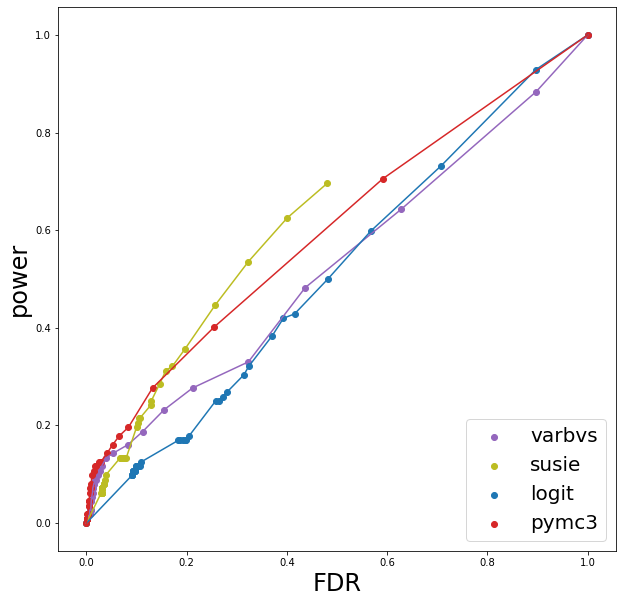

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.scatter(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4", label='varbvs')
plt.plot(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4")
plt.scatter(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8", label='susie')
plt.plot(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8")
plt.scatter(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C0", label='logit')
plt.plot(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C0")
plt.scatter(res1["pymc3_pip_FDR"], res1["pymc3_pip_power"], c = "C3", label='pymc3')
plt.plot(res1["pymc3_pip_FDR"], res1["pymc3_pip_power"], c = "C3")
plt.legend(loc = 'lower right', fontsize = 20)
plt.xlabel("FDR", fontproperties=font_prop)
plt.ylabel("power", fontproperties=font_prop)
plt.savefig("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC20.pdf")
plt.show()

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf (16.0 KiB):

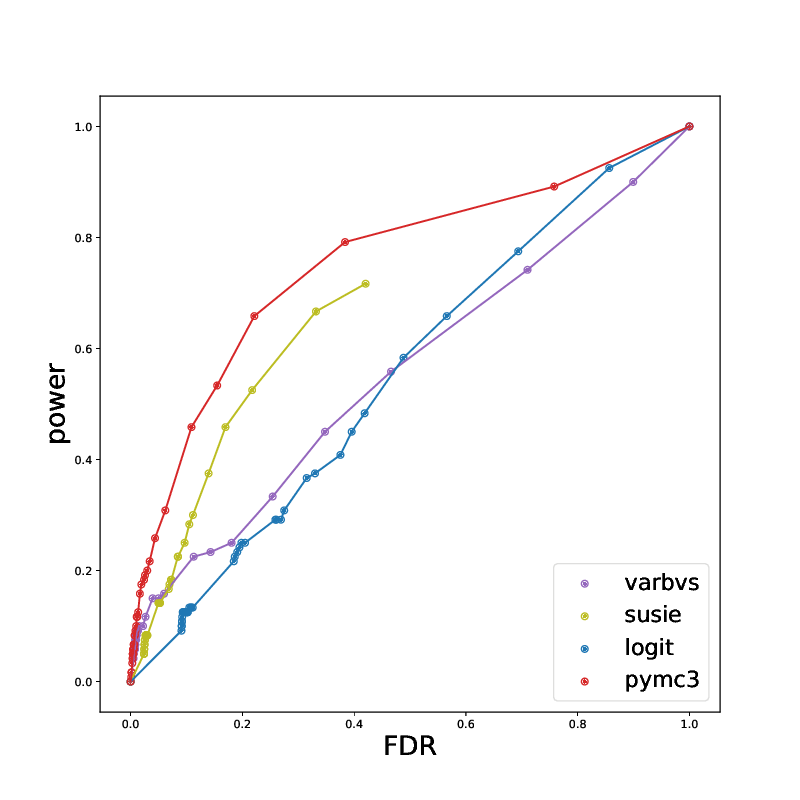

In [76]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf -s png --dpi 80

In [20]:
%get calib

In [21]:
library(ggplot2)
library(cowplot)
library(dplyr)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [22]:
bin_size = 20
bins = cbind(seq(1:bin_size)/bin_size-1/bin_size, seq(1:bin_size)/bin_size)

In [24]:
head(calib)

,susie_pip,pymc3_pip,is_signal
0,0.125,0.0260,0
1,0.125,0.0205,0
2,0.125,0.0235,0
3,0.125,0.0270,0
4,0.125,0.0180,1
5,0.125,0.0180,0


In [25]:
pip_cali = list()
for (name in rev(colnames(calib))[-1]) {
    for (i in 1:nrow(bins)) {
        tmp = calib[which(calib[[name]] > bins[i,1] & calib[[name]] < bins[i,2]), ]
        if (is.null(pip_cali[[name]])) pip_cali[[name]] = c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal))
        else pip_cali[[name]] = rbind(pip_cali[[name]], c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal)))
    }
    pip_cali[[name]][which(is.na(pip_cali[[name]]))] = 0
}

In [26]:
get_cali = function(alist, col) { # alist = pip_cali
    res = alist[[col]]
    if (!is.null(alist[[col]])) res = res + alist[[col]]
    res[,c(1,2)] = res[,c(1,2)] / res[,3]
    return(res[-1,])
}

In [27]:
res = get_cali(pip_cali, "logit_pip")

In [28]:
saveRDS(list("susie" = get_cali(pip_cali, 'susie_pip'),
             "logit" = get_cali(pip_cali, 'logit_pip'),
             "varbvs" = get_cali(pip_cali, 'varbvs_pip'),
             "pymc3" = get_cali(pip_cali, 'pymc3_pip')),
             "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.RDS")

In [29]:
dat = readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.RDS")

In [30]:
dot_plot = function(dataframe) {
  ggplot(dataframe, aes(x=mean_pip, y=observed_freq)) +
    geom_errorbar(aes(ymin=observed_freq-se, ymax=observed_freq+se), colour="gray", size = 0.2, width=.01) +
    geom_point(size=1.5, shape=21, fill="#002b36") + # 21 is filled circle
    xlab("Mean PIP") +
    ylab("Observed frequency") +
    coord_cartesian(ylim=c(0,1), xlim=c(0,1)) +
    geom_abline(slope=1,intercept=0,colour='red', size=0.2) +
    ggtitle(name) +
    expand_limits(y=0) + 
    theme_cowplot()
}

In [31]:
idx = 0
for (name in names(dat)) {
    idx = idx + 1
    dat[[name]][,3] = sqrt(dat[[name]][,2] * (1 - dat[[name]][,2]) / dat[[name]][,3]) * 2
    dat[[name]] = as.data.frame(dat[[name]])
    colnames(dat[[name]]) = c("mean_pip", "observed_freq", "se")
    pdf(paste0("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/", name, '_' , idx, '.pdf'), width=3, height=3, pointsize=16)
    print(dot_plot(dat[[name]]))
    dev.off()
    system(paste0("convert -flatten -density 120 ", "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/", name, '_' , idx, '.pdf', " ", 
                  "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/", name, '_' , idx, '.png'))
}

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

In [32]:
names(dat)

[1] "susie" "pymc3"